<a href="https://colab.research.google.com/github/Jesus20MM/Proyecto-ventas/blob/main/Proyecto_Departamento_de_Ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1: ENTENDER EL ENUNCIADO DEL PROBLEMA Y EL CASO PRÁCTICO

https://www.kaggle.com/c/rossmann-store-sales/data

#### Primer dataset

- dayofweek: dia de la semana
- date: fecha
- Tienda: un ID único para cada tienda
- Ventas: la facturación de un día determinado (esto es lo que está prediciendo)
- Clientes: el número de clientes en un día determinado
- Abierto: un indicador de si la tienda estaba abierta: 0 = cerrada, 1 = abierta
- promo: si habia promocion o no
- StateHoliday - indica un feriado estatal. Normalmente todas las tiendas, con pocas excepciones, están cerradas los días festivos estatales. Tenga en cuenta que todas las escuelas están cerradas los días festivos y fines de semana. a = día festivo, b = vacaciones de Pascua, c = Navidad, 0 = Ninguna
- SchoolHoliday - indica si la tienda se vio afectada por el cierre de las escuelas públicas

#### Segundo dataset
- store: un ID único para cada tienda (llave primaria entre datasets)
- StoreType - diferencia entre 4 modelos de tienda diferentes: a, b, c, d
- Surtido: describe un nivel de surtido: a = básico, b = extra, c = extendido
- CompetitionDistance - distancia en metros a la tienda competidora más cercana
- CompetitionOpenSince[Mes/Año] - da el año y mes aproximados de la hora en que se abrió el competidor más cercano
- Promoción: indica si una tienda está publicando una promoción ese día.
- Promo2 - Promo2 es una promoción continua y consecutiva para algunas tiendas: 0 = la tienda no participa, 1 = la tienda está participando
- Promo2Since[Año/Semana]: describe el año y la semana del calendario en que la tienda comenzó a participar en la promoción2
- PromoInterval: describe los intervalos consecutivos en los que se inicia Promo2, nombrando los meses en que se inicia de nuevo la promoción. Por ejemplo, "febrero, mayo, agosto, noviembre" significa que cada ronda comienza en febrero, mayo, agosto, noviembre de cualquier año determinado para esa tienda.

El objetivo es predecir las ventas futuras en funcion de la data histórica proporcionada por el cliente (empresas). Se trata de un analisis con series temporales. Y tenemos dos datasets, el primero tiene informacion de las ventas y el segundo de las tiendas.

# 2: IMPORTAR LAS LIBRERÍAS Y LOS DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime#nos va a permitir trabajar y manipular series temporales

In [2]:
# Necesitarás montar tu disco usando los siguientes comandos:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


##2.1: IMPORTAR EL DATASET DE VENTAS

In [3]:
sales_train_df=pd.read_csv('/content/drive/MyDrive/UDEMY Data Science aplicado a Negocios  6 Casos de Estudio Reales/SECCION 4 Departamento de ventas/train.csv')
sales_train_df

/tmp/ipython-input-3-1877634799.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_train_df=pd.read_csv('/content/drive/MyDrive/UDEMY Data Science aplicado a Negocios  6 Casos de Estudio Reales/SECCION 4 Departamento de ventas/train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [4]:
sales_train_df.shape

(1017209, 9)

In [ ]:
sales_train_df.info()
# 9 columnas en total
# 8 características
# 1 variable target (ventas)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
# Cantidad de ventas promedio por día = 5773, ventas mínimas por día = 0, ventas máximas por día = 41551
# Número medio de clientes por dia = 633, número mínimo de clientes = 0, número máximo de clientes = 7388
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


##2.2: IMPORTAR LA INFORMACIÓN SOBRE LAS TIENDAS



In [6]:
store_info_df = pd.read_csv('/content/drive/MyDrive/UDEMY Data Science aplicado a Negocios  6 Casos de Estudio Reales/SECCION 4 Departamento de ventas/store.csv')
store_info_df.head(5)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [7]:
store_info_df.shape

(1115, 10)

In [9]:
store_info_df.info()
# Hay que tener en cuenta que el data frame anterior incluye las transacciones registradas por día (en millones)
# Este data frame solo incluye información sobre las 1115 tiendas exclusivas que forman parte de este caso

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [10]:
# De media, la distancia de la competencia es de 5404 metros (5,4 kms)
store_info_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


# 3: EXPLORAR EL DATASET

## 3.1: EXPLORAR Y LIMPIAR EL DATASET DE VENTAS

In [11]:
# Veamos si nos faltan datos, ¡esperemos que no sea así!
sales_train_df.isnull().sum()#en el sataset de ventas no hay data nula

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'DayOfWeek'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Customers'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Promo'}>],
       [<Axes: title={'center': 'SchoolHoliday'}>, <Axes: >, <Axes: >]],
      dtype=object)

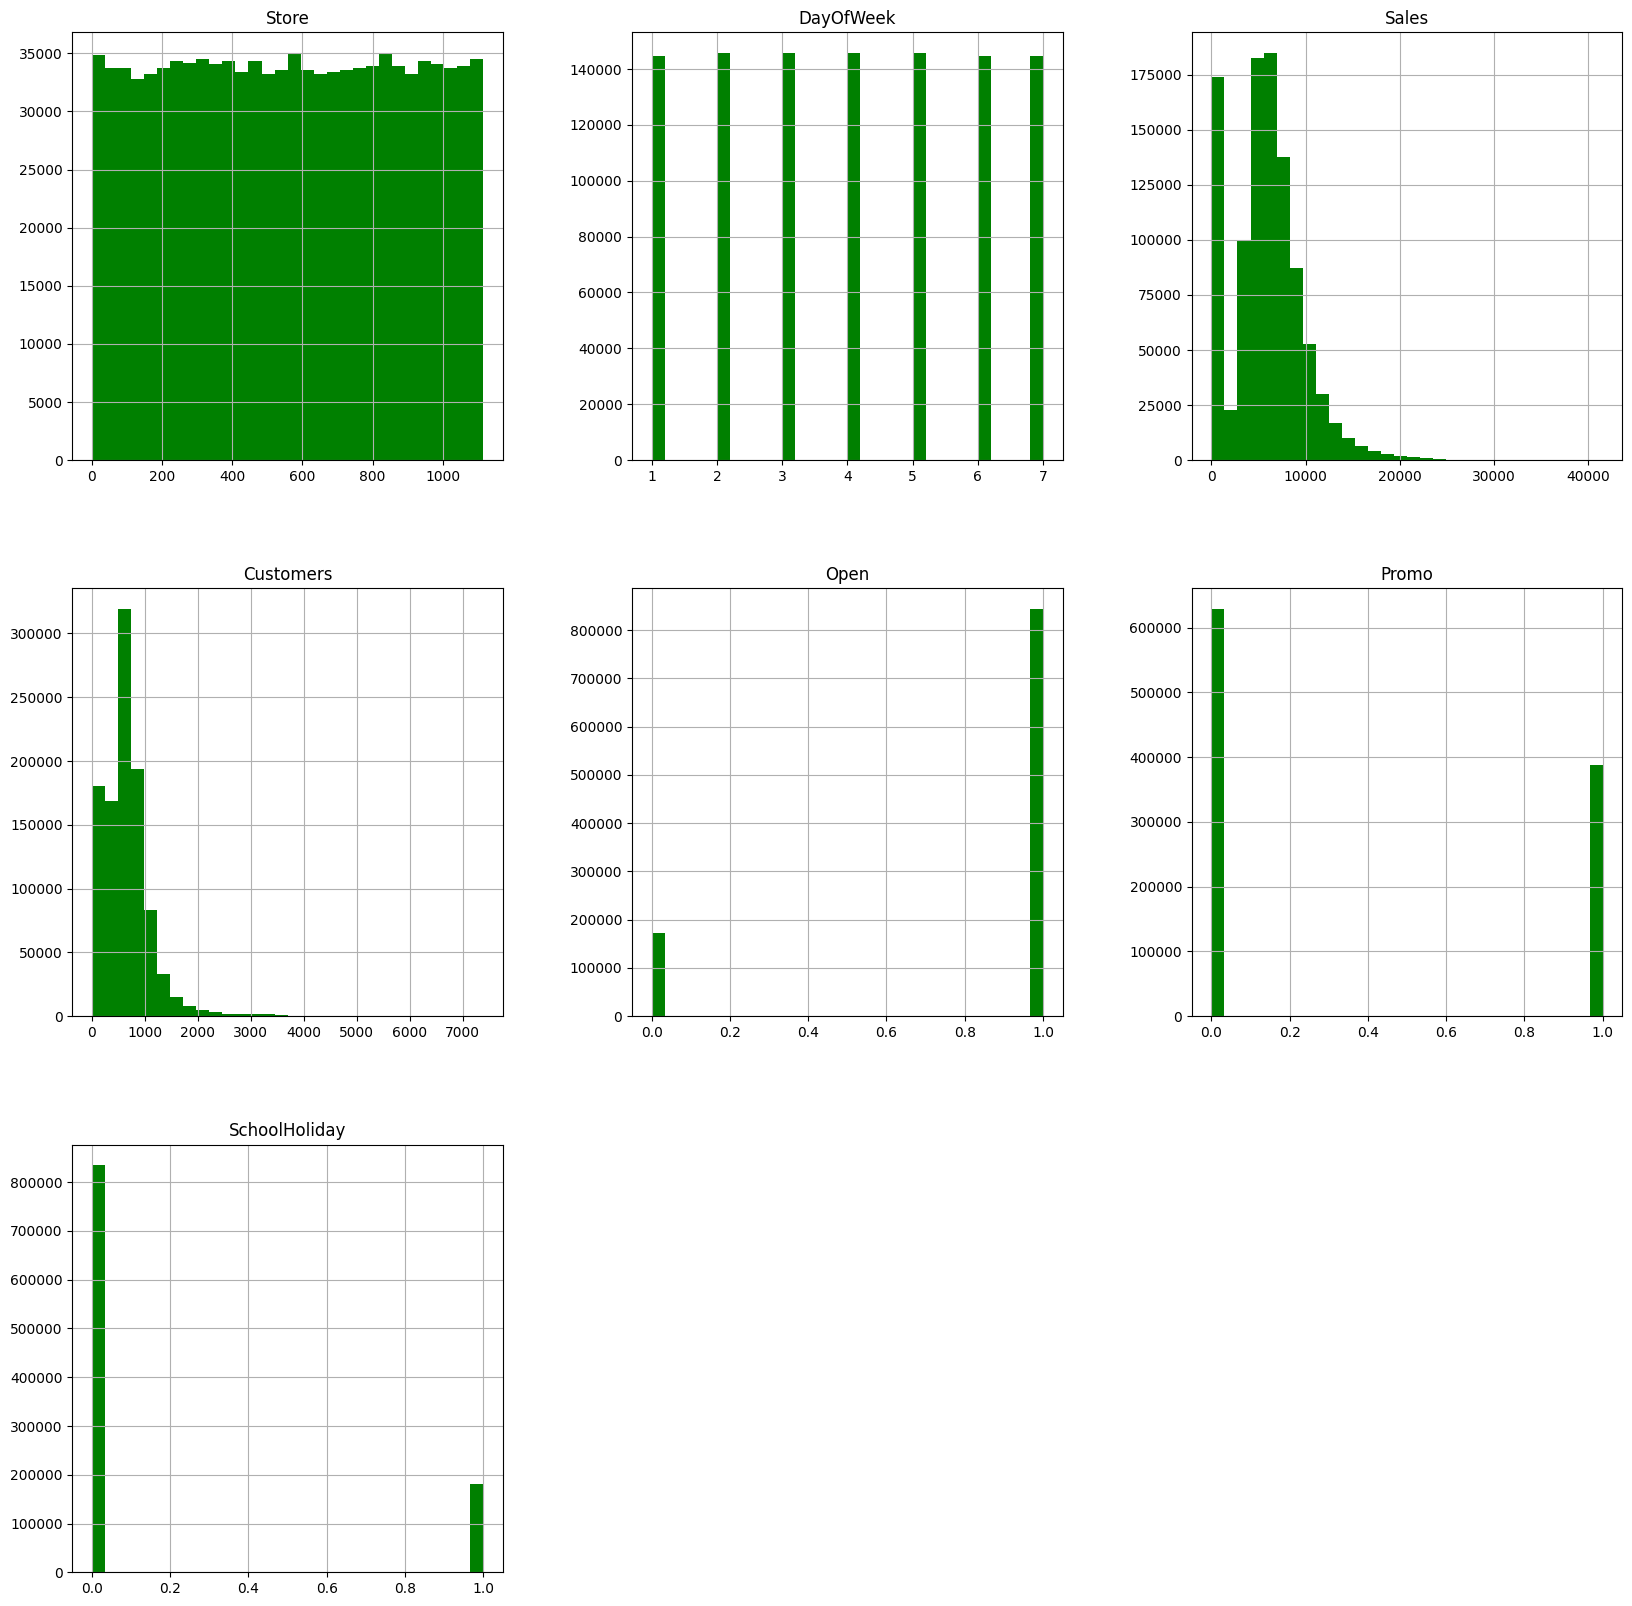

In [ ]:
#hacemos un histograma del primer dataframe para saber la distribucion de las variablñes
sales_train_df.hist(bins = 30, figsize=(20,20), color = 'g')#usamos seaborm, bins no. de barras, tamaño de la figura y color

# ALGUNAS NOTAS:

# Promedio de 600 clientes por día, el máximo es 4500 (¡tenga en cuenta que no podemos ver el valor atípico en 7388!)
# Los datos se distribuyen por igual en varios días de la semana (~ 150000 observaciones x 7 días = ~ 1,1 millones de observaciones)
# Las tiendas están abiertas ~ 80% del tiempo
# Los datos se distribuyen por igual entre todas las tiendas (sin sesgo)
# La promoción # 1 se ejecutó aproximadamente el 40% del tiempo
# Ventas promedio alrededor de 5000-6000 Euros
# Las vacaciones escolares duran alrededor del 18% del tiempo


In [ ]:
#el maximo numero de clientes en un dia determinado
sales_train_df['Customers'].max()
#una buena pregunta sería, ¿en qué fecha sucede esto, y en qué fechas hay un aumento de clientes por dia para determinadas tiendas? con ciertas caracteristicas a considerar, por ejemplo

7388

In [ ]:
# Veamos cuántas tiendas están abiertas y cerradas
sales_train_df['Open'].value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [13]:
# lo haremos ahora de tal forma que podamos almacenar esa data en dos df's separados
closed_train_df=sales_train_df[sales_train_df['Open']==0]
open_train_df=sales_train_df[sales_train_df['Open']==1]

In [ ]:
print(len(closed_train_df))
print(len(open_train_df))

172817
844392


In [ ]:
# forma alternativa
print("Total = {} ".format(len(sales_train_df)))
print("Número de tiendas abiertas = {}".format(len(open_train_df)))
print("Número de tiendas cerradas = {}".format(len(closed_train_df)))
print("Porcentaje de tiendas cerradas = {}%".format(100.0*len(closed_train_df)/len(sales_train_df)))

Total = 1017209 
Número de tiendas abiertas = 844392
Número de tiendas cerradas = 172817
Porcentaje de tiendas cerradas = 16.98933060954042%


In [18]:
# Nos aseguramos de que las tiendas cerradas no tienen ventas para poder eliminarlas
closed_train_df['Sales'].value_counts()

,count
Sales,
0,172817


In [14]:
# nos quedamos solo con las tiendas abiertas y eliminamos las tiendas cerradas, pues estas no aportan informacion relevante
sales_train_df=open_train_df
sales_train_df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [15]:
sales_train_df.shape
#notése que redujimos el no. de datos de observaciones

(844392, 9)

In [16]:
# Eliminemos la columna open ya que ahora no tiene sentido
sales_train_df.drop(['Open'], axis = 1, inplace = True)

/tmp/ipython-input-16-1325873159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_train_df.drop(['Open'], axis = 1, inplace = True)


In [17]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [ ]:
# Ventas promedio = 6955 Euros, número promedio de clientes = 762 (ha subido)
sales_train_df.describe#ya con la data modificada de forma correcta, la descriptiva univariada de las variables cambia respecto a la primera descripcion; con Open eliminada
#tambien redujimos el tamaño del dataset con el que trabajaremos, de un millonn a 800000 aprox

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


##3.2: EXPLORAR Y LIMPIAR LOS DATOS DE LA INFORMACIÓN DE LAS TIENDAS

In [ ]:
# Veamos si falta algún dato en el data frame de información de la tienda
store_info_df.isnull().sum()#notamos que, para las columnas con data nula, es un porcentaje importante respecto a la data total

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
store_info_df.shape

(1115, 10)

In [ ]:
# valores faltantes en la 'CompetitionDistance'
# Solo faltan 3 filas, con lo que es completamente valido rellenar con alguna tecnica
store_info_df[store_info_df['CompetitionDistance'].isnull()]



,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [ ]:
# valores faltantes en el 'CompetitionOpenSinceMonth'
# Faltan muchas filas = 354 (casi un tercio de las 1115 tiendas)
store_info_df[store_info_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
#caracteristicas asociadas cuando no hay pomo2
store_info_df[store_info_df['Promo2'] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


Note que la NaN en las ultimas 3 columnas significa que cada que hay una NaN, la tienda no ha hecho nunca una promocion, no que falte data.

Reemplazar la media en los nulos en este casoo no sería correcto, pues la data de CompetitionOpenSinceMonth no tiene sentido colocar la media

In [ ]:
# Parece que si 'promo2' es cero, 'promo2SinceWeek', 'Promo2SinceYear' y la información de 'PromoInterval' se establece en cero para quitarnos esa NaN's "incorrectas"
# Hay 354 filas donde 'CompetitionOpenSinceYear' y 'CompetitionOpenSinceMonth' falta
# Establezcamos estos valores en ceros, es decir, cambiamos los NaN's por ceros, pues no significa data nula en este caso, sino que el valor binario es cero para esas observaciones

#por el argumento anterior, reemplazaremos la data nula por ceros
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']
for str in str_cols:
    store_info_df[str].fillna(0, inplace = True)

In [ ]:
store_info_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          3
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [ ]:
# Hay 3 filas con valores de 'CompetitionDistance' que faltan, llenémoslas con valores promedio de la columna 'CompetitionDistance'
#para este caso si tiene sentido reemplazar por la media
store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(), inplace=True)

In [ ]:
store_info_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Naturalmente, al rellenar la data por data 'artificial' se genera un poco de error en nuestros datos

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'CompetitionDistance'}>,
        <Axes: title={'center': 'CompetitionOpenSinceMonth'}>],
       [<Axes: title={'center': 'CompetitionOpenSinceYear'}>,
        <Axes: title={'center': 'Promo2'}>,
        <Axes: title={'center': 'Promo2SinceWeek'}>],
       [<Axes: title={'center': 'Promo2SinceYear'}>, <Axes: >, <Axes: >]],
      dtype=object)

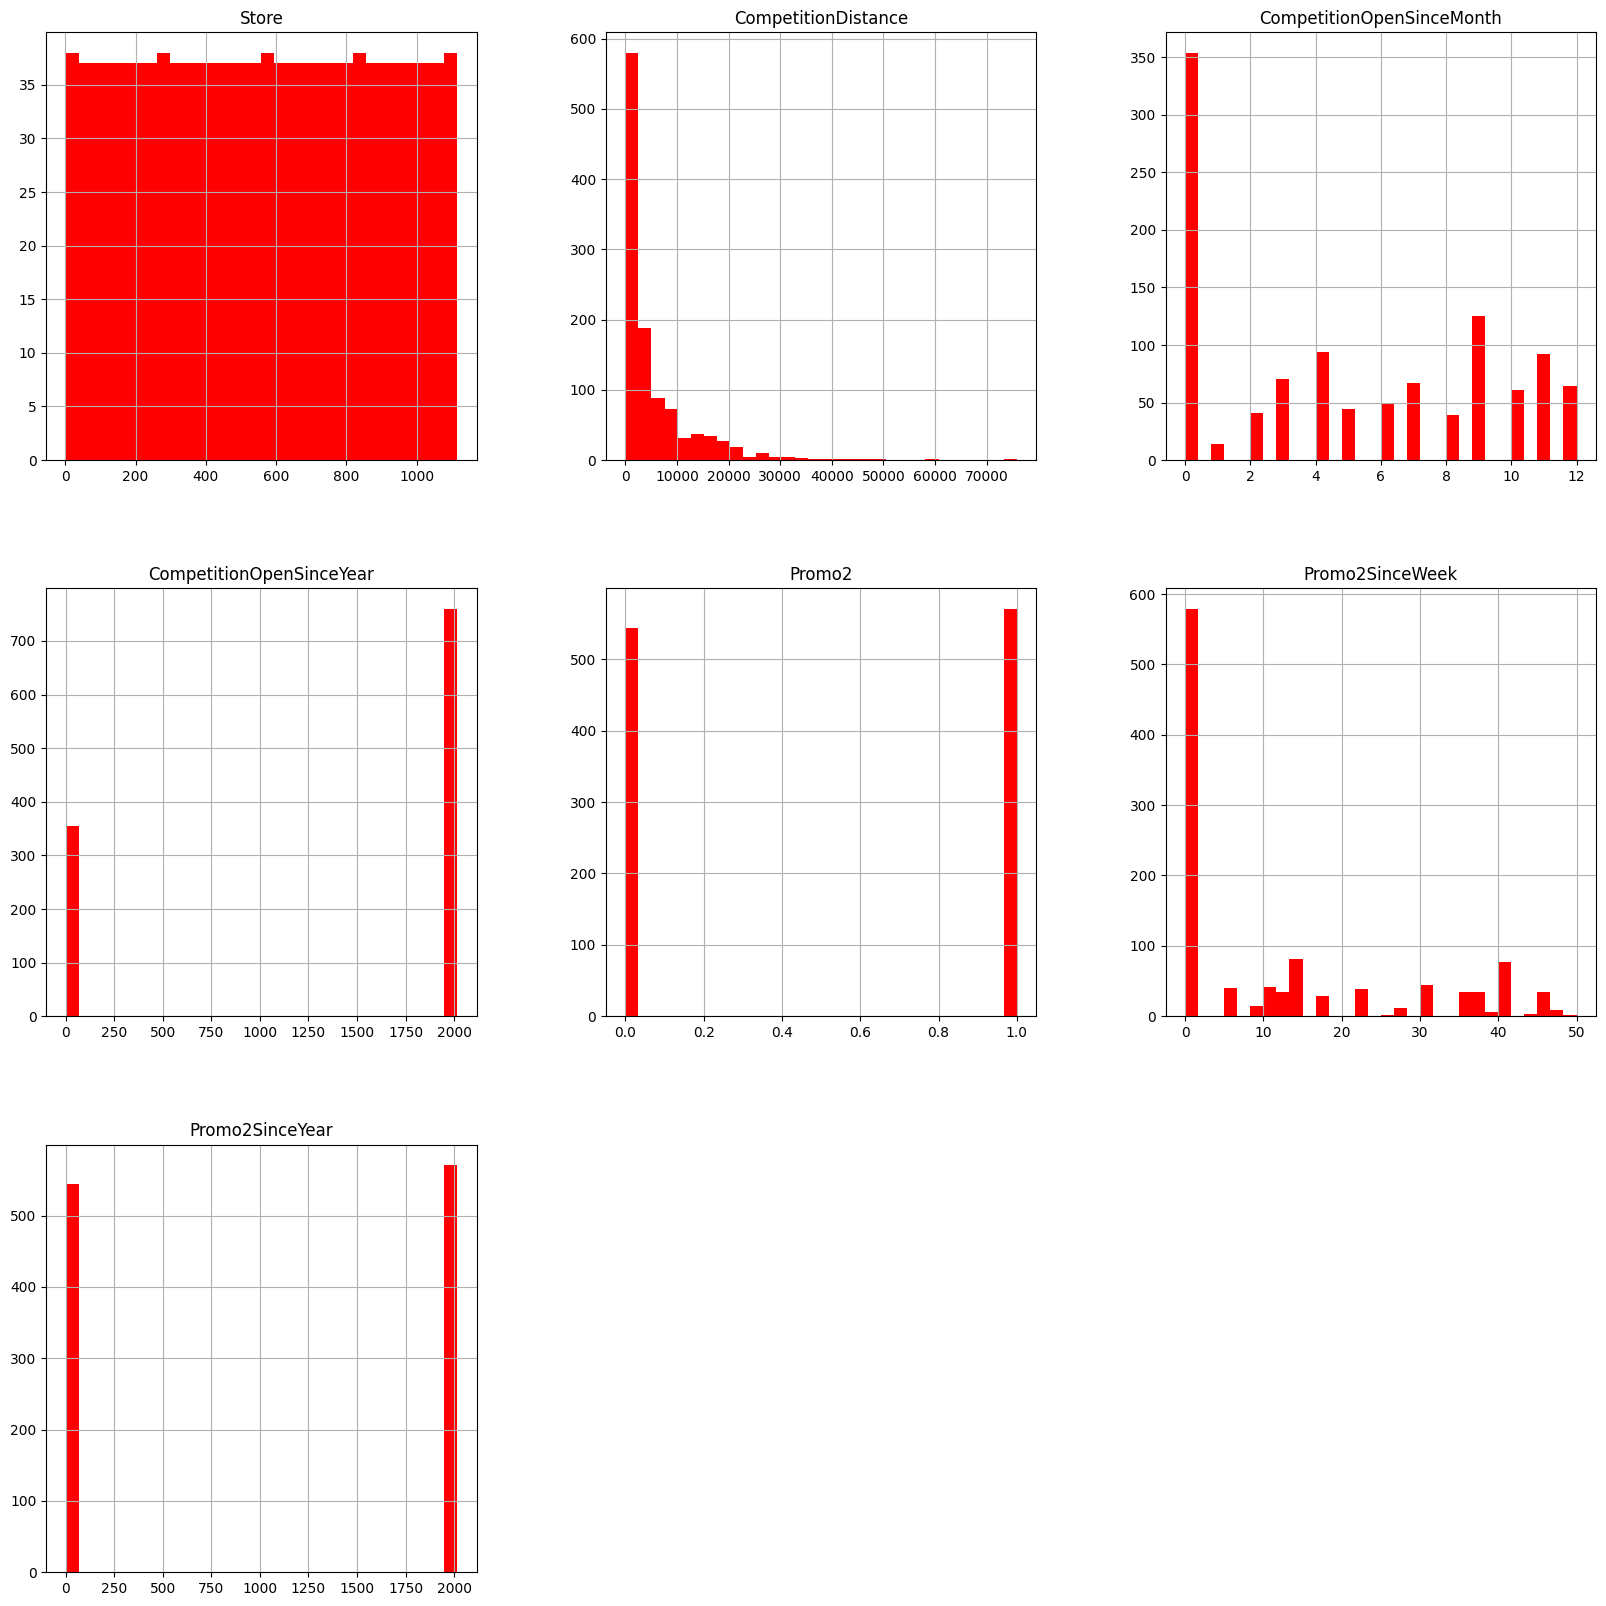

In [ ]:
# la mitad de las tiendas participan en la promoción 2
# la mitad de las tiendas tienen su competencia a una distancia de 0-3000 m (3 kms de distancia)
store_info_df.hist(bins = 30, figsize=(20,20), color = 'r')

- notamos que todas las tiendas estan separadas por lo menos en 100m entre sí y tenemos algunos datos atipicos en la distancia entre tiendas

## 3.3: EXPLOREMOS LOS DATASETS COMBINADOS

In [ ]:
# Combinemos ambos data frames en función de 'store' (llave primaria entre los dos datasets)
sales_train_all_df = pd.merge(sales_train_df, store_info_df, how = 'inner', on = 'Store')#lo unimon (inner) mediante la llave primaria "store"

In [ ]:
sales_train_all_df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [ ]:
sales_train_all_df.shape

(1017209, 17)

In [ ]:
#esto se hace para guardar en un csv el dataset anterior y no ejecutar todo lo anterior para llegar a éste
sales_train_all_df.to_csv('test.csv', index = False)

In [ ]:
##una forma mas directa de ver las correlaciones con las ventas "sales"; sales vs todas las variables (de par en par)
correlations = sales_train_all_df.corr()['Sales'].sort_values()
correlations
# los clientes y la promoción se correlacionan positivamente con las ventas
# Promo2 no parece ser efectivo en absoluto

#note que obviamente no mide la correlacion con las variables tipo string

<ipython-input-13-6a3ebb8ff9d8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = sales_train_all_df.corr()['Sales'].sort_values()


DayOfWeek                   -0.462125
Promo2SinceYear             -0.091056
Promo2                      -0.091040
Promo2SinceWeek             -0.044143
CompetitionDistance         -0.019207
CompetitionOpenSinceMonth   -0.012431
CompetitionOpenSinceYear     0.002749
Store                        0.005126
SchoolHoliday                0.085124
Promo                        0.452345
Customers                    0.894711
Sales                        1.000000
Name: Sales, dtype: float64

- Nos podemos dar cuenta que el valor de la correlacion con las variables binarias no es del todo cierta, pues la correlacion entre variable continua y binaria se debe entender de otra forma; por ejemplo, es intuitivo cualitativamente pensar que la variable ventas tiene mucha correlacion con promo uno (en promocion hay mas probabilidad de venta), sin embargo esa correlacion no se ve reflejada en el valor de la correlacion

<ipython-input-14-3675d545eaad>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = sales_train_all_df.corr()


<Axes: >

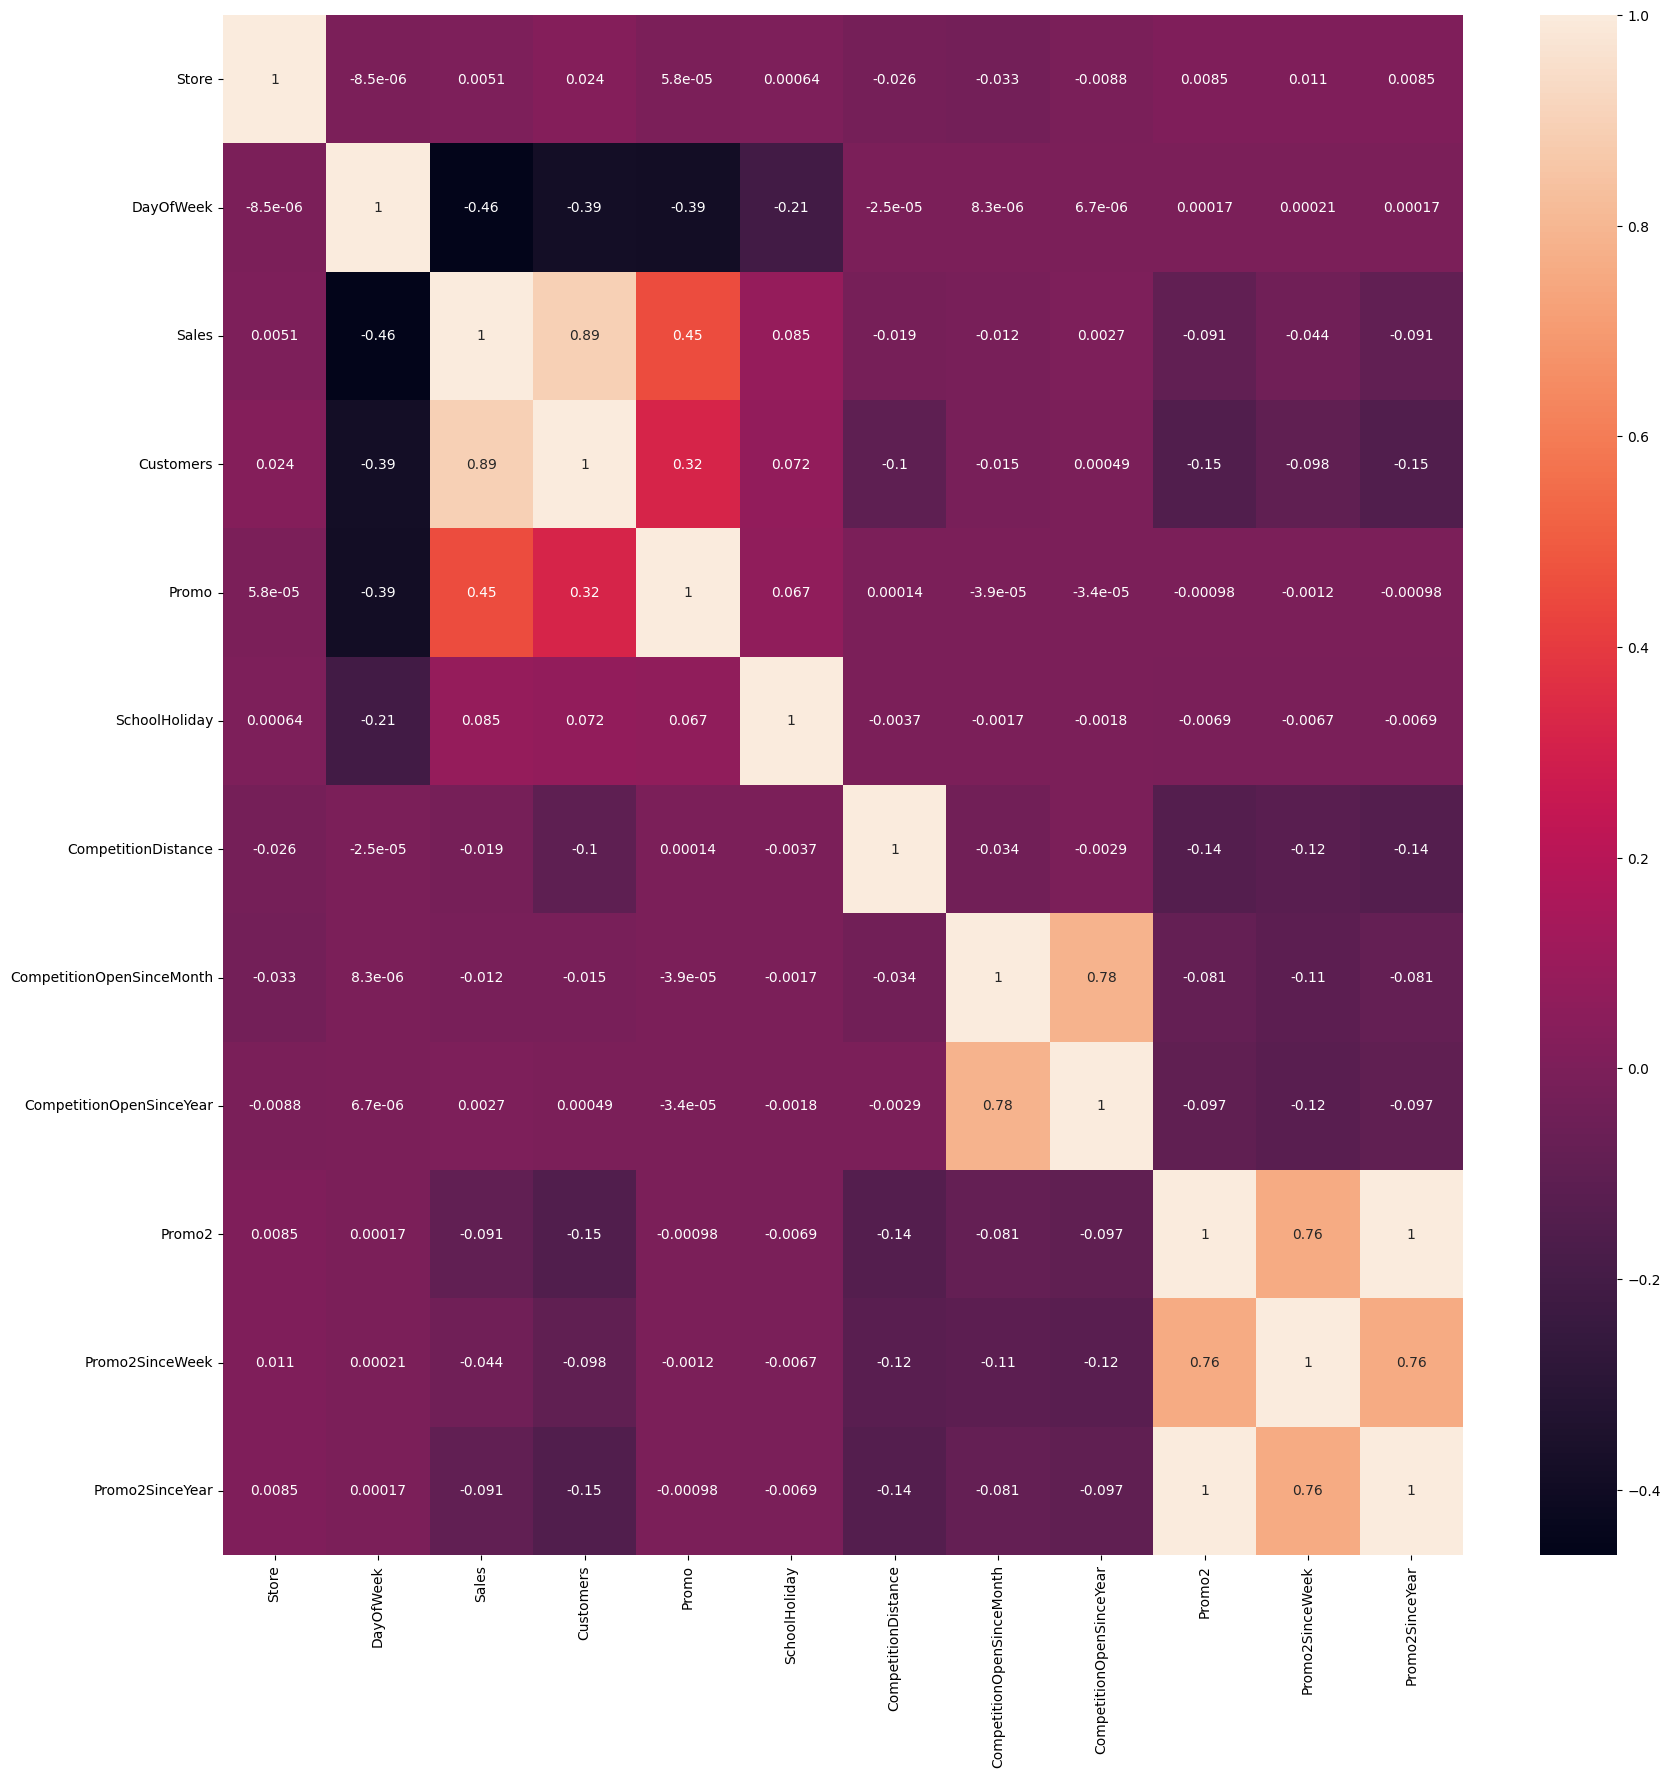

In [ ]:
#hacemos un mapa de calor
correlations = sales_train_all_df.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot=True)
# Los clientes / Promo2 y las ventas están fuertemente correlacionados

## Análisis de series temporales

In [ ]:
# Separemos el año y pongámoslo en una columna separada con la libreria datetime
sales_train_all_df['Year'] = pd.DatetimeIndex(sales_train_all_df['Date']).year

In [ ]:
# Hagamos lo mismo para el día y el mes
sales_train_all_df['Month'] = pd.DatetimeIndex(sales_train_all_df['Date']).month
sales_train_all_df['Day'] = pd.DatetimeIndex(sales_train_all_df['Date']).day

In [ ]:
#vemos que las 3 nuevas columnas ya tienen un caracter de numero
sales_train_all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844392 non-null  int64  
 1   DayOfWeek                  844392 non-null  int64  
 2   Date                       844392 non-null  object 
 3   Sales                      844392 non-null  int64  
 4   Customers                  844392 non-null  int64  
 5   Promo                      844392 non-null  int64  
 6   StateHoliday               844392 non-null  object 
 7   SchoolHoliday              844392 non-null  int64  
 8   StoreType                  844392 non-null  object 
 9   Assortment                 844392 non-null  object 
 10  CompetitionDistance        844392 non-null  float64
 11  CompetitionOpenSinceMonth  844392 non-null  float64
 12  CompetitionOpenSinceYear   844392 non-null  float64
 13  Promo2                     84

In [ ]:
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27


In [ ]:
#agrupamos ventas y meses
a=sales_train_all_df.groupby('Month')[['Sales']].mean()
a

,Sales
Month,
1,6563.690444
2,6589.165535
3,6976.412026
4,7046.228420
5,7106.453154
6,7000.978190
7,6952.682125
8,6648.984654
9,6546.343035


Text(0.5, 1.0, 'Ventas promedio por Mes')

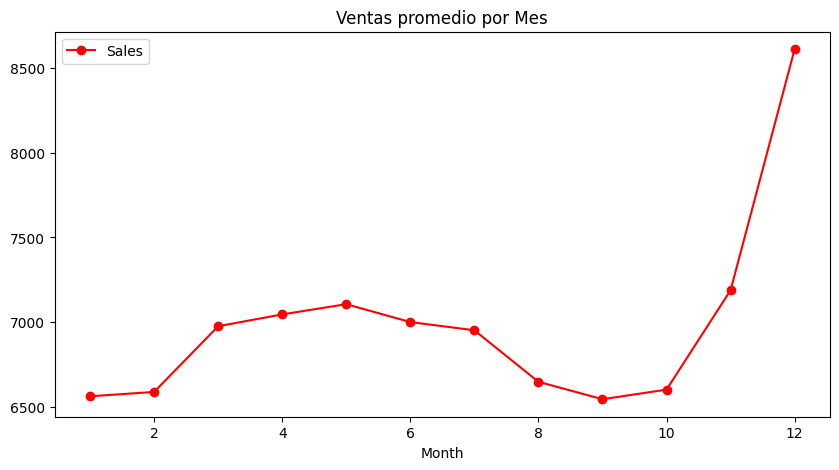

In [ ]:
# ventas promedio por mes.
axis = a.plot(figsize = (10, 5), marker = 'o', color = 'r')#agrupar por mes las ventas medias y graficarlas respecto a los meses
axis.set_title("Ventas promedio por Mes")

- Las ventas alcanzan su punto máximo en el período de Navidad y vemos que empieza a subir desde octubre
- Las ventas se mantienen aproximadamente con estabilidad entre marzo y julio
- Las peores etapas son los dos primero meses del año y en agosto y septiembre

Text(0.5, 1.0, 'Clientes promedio por Mes')

<Figure size 640x480 with 0 Axes>

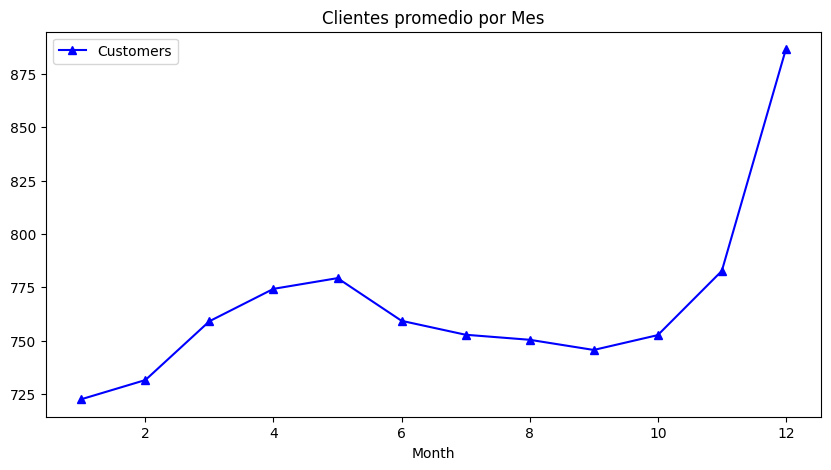

In [ ]:
#clientes por mes
plt.figure()
axis = sales_train_all_df.groupby('Month')[['Customers']].mean().plot(figsize = (10, 5), marker = '^', color = 'b')
axis.set_title("Clientes promedio por Mes")

- Vemos que la relacion cliente-ventas esta completamente relacionada, pues ambas graficas siguen practicamente la misma tendencia temporal

Text(0.5, 1.0, 'Clientes promedio por Dia')

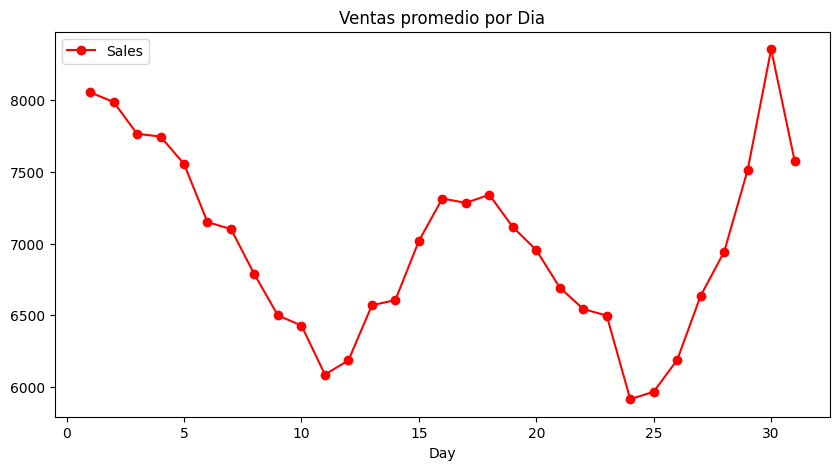

<Figure size 640x480 with 0 Axes>

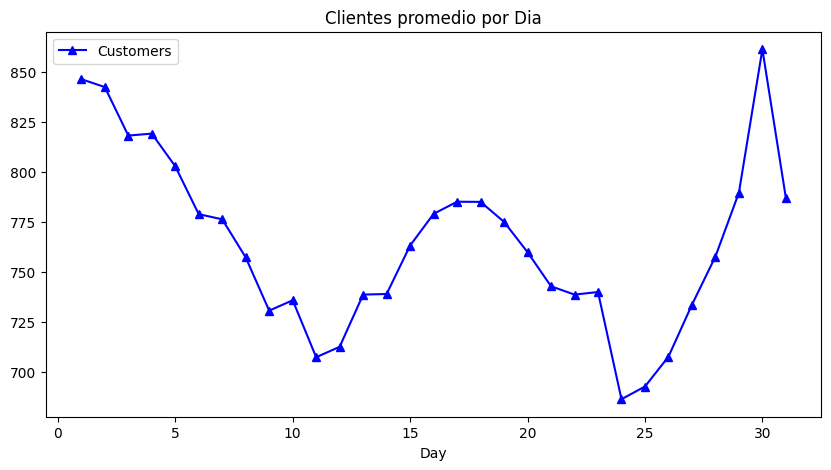

In [ ]:
# ventas y clientes por dia
axis = sales_train_all_df.groupby('Day')[['Sales']].mean().plot(figsize = (10, 5), marker = 'o', color = 'r')
axis.set_title("Ventas promedio por Dia")


plt.figure()
axis = sales_train_all_df.groupby('Day')[['Customers']].mean().plot(figsize = (10, 5), marker = '^', color = 'b')
axis.set_title("Clientes promedio por Dia")

#nota esta data de 31 dias al parecer es del mes 7 del 2015

- El número mínimo de clientes suele rondar el día 24 del mes.
- La mayoría de los clientes y las ventas son alrededor del 30 y el 1 del mes
- al igual que antes, notamos que hay una relacion directa entre ambas variables respecto al dia

Text(0.5, 1.0, 'Clientes promedio por dia de la semana')

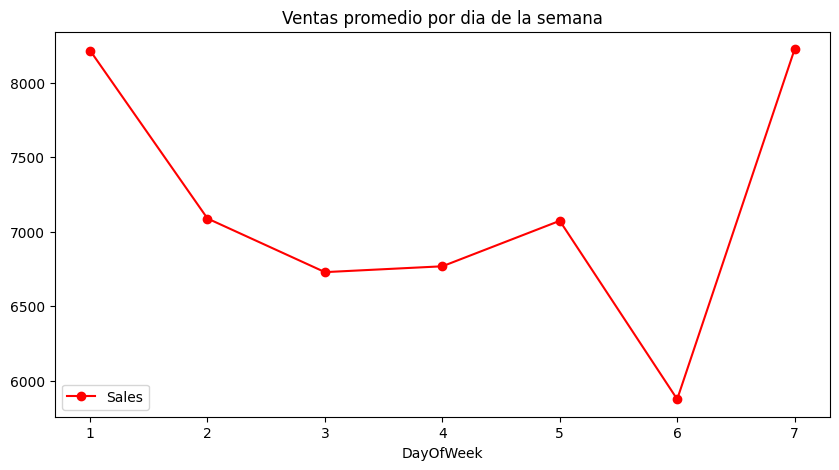

<Figure size 640x480 with 0 Axes>

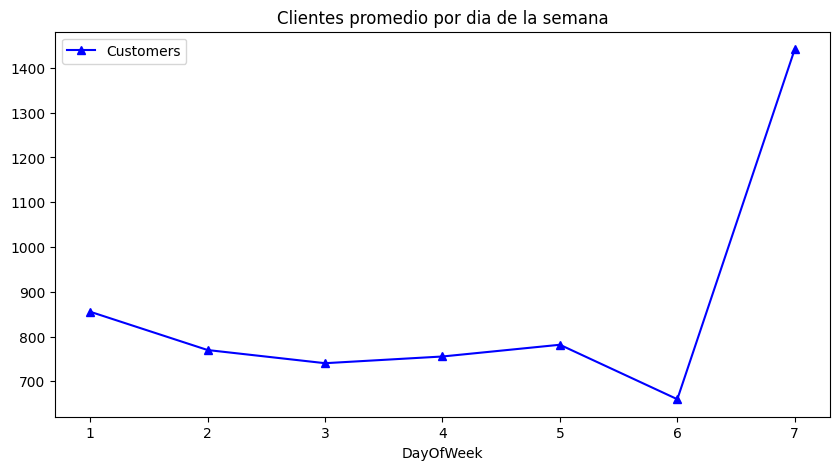

In [ ]:
# Hagamos lo mismo para el día de la semana (notemos que 7 = domingo, 1=lunes)
axis = sales_train_all_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (10, 5), marker = 'o', color = 'r')
axis.set_title("Ventas promedio por dia de la semana")


plt.figure()
axis = sales_train_all_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (10, 5), marker = '^', color = 'b')
axis.set_title("Clientes promedio por dia de la semana")

<ipython-input-22-e3bd3f8653cd>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_train_all_df.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax = ax)


<Axes: xlabel='Date'>

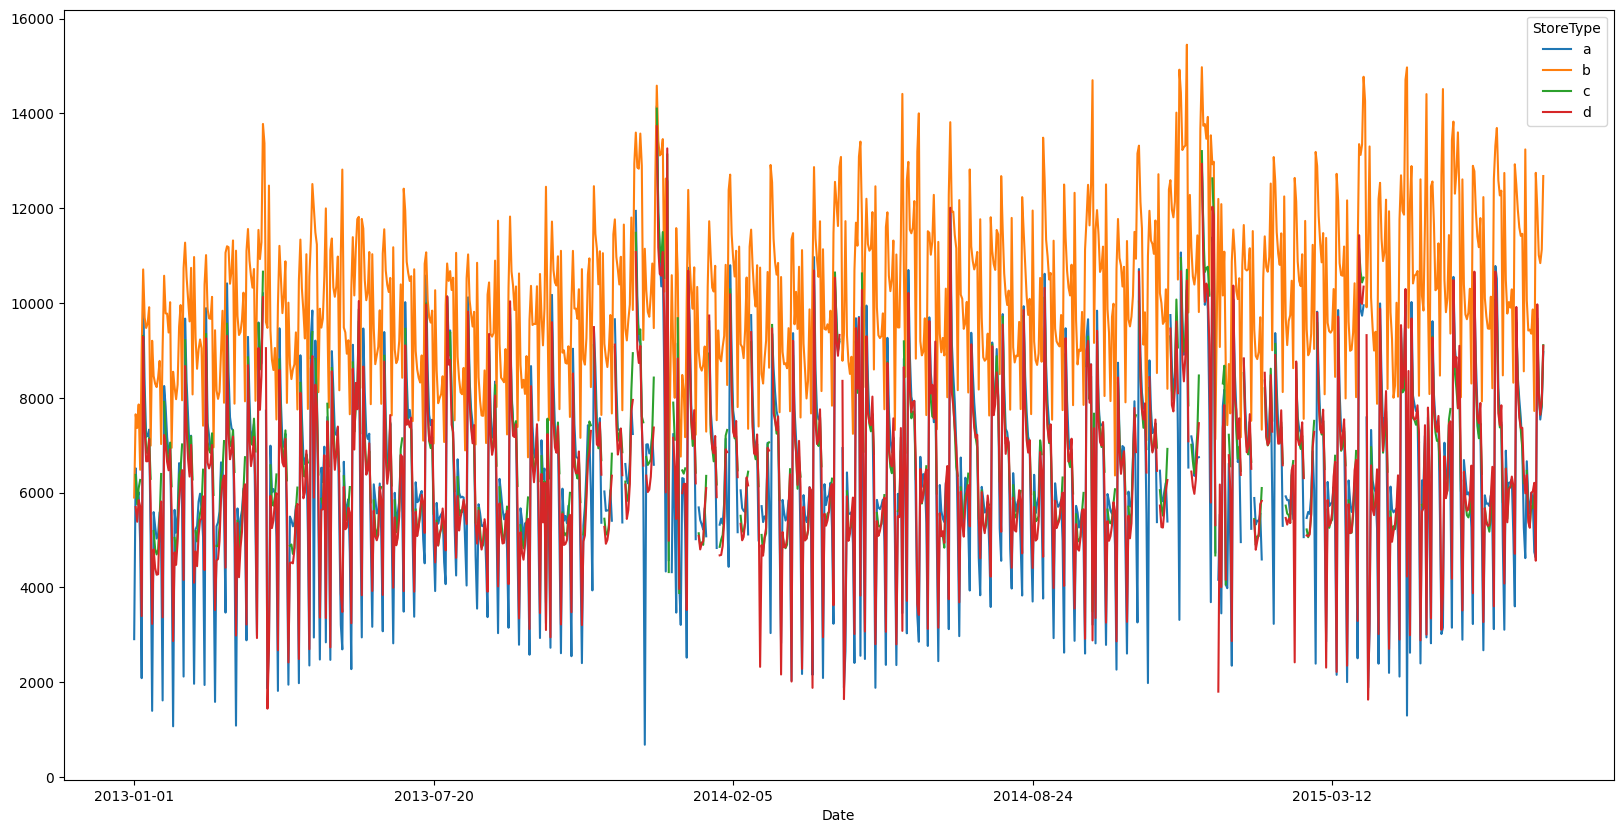

In [ ]:
#agrupar por fecha y tipo de tienda, unstack()es lo diferente de este grafico
fig, ax = plt.subplots(figsize = (20, 10))
sales_train_all_df.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax = ax)

<Axes: xlabel='Promo', ylabel='Customers'>

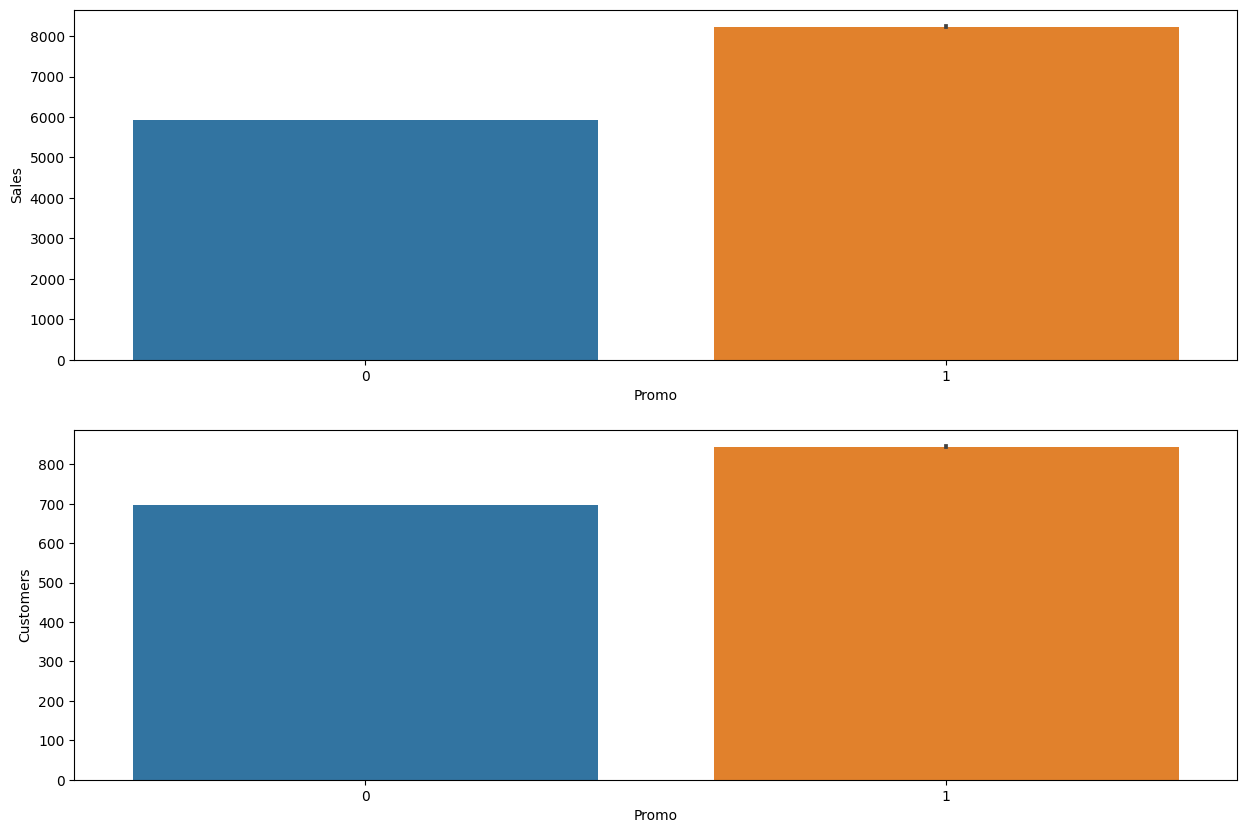

In [ ]:
#distribucion de ventas y numero de clientes por promocion (si hay o no promocion)
plt.figure(figsize=[15,10])

plt.subplot(211)
sns.barplot(x = 'Promo', y = 'Sales', data = sales_train_all_df)

plt.subplot(212)
sns.barplot(x = 'Promo', y = 'Customers', data = sales_train_all_df)

<Axes: xlabel='Promo', ylabel='Customers'>

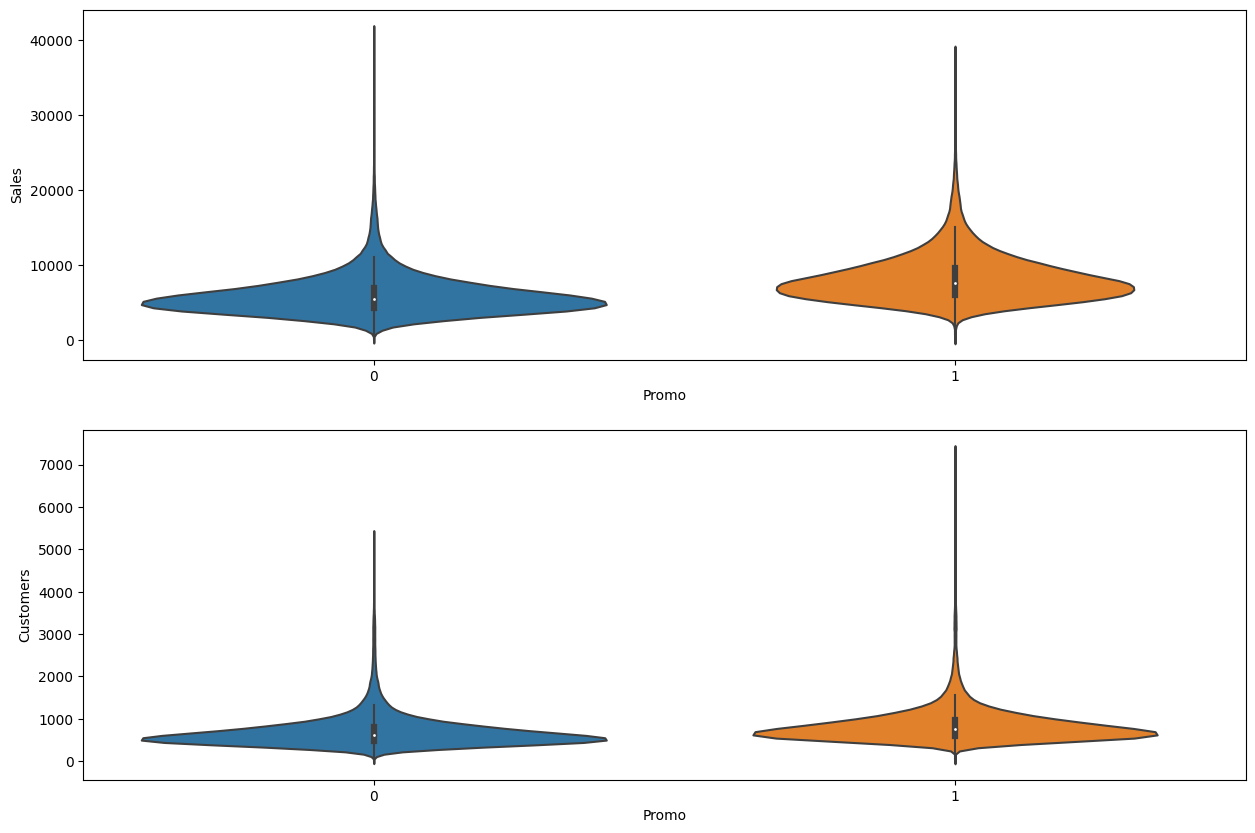

In [ ]:
#diagrama de violin
# dsitribucion de probabilidad para cada una de las variables
plt.figure(figsize=[15,10])

plt.subplot(211)
sns.violinplot(x = 'Promo', y = 'Sales', data = sales_train_all_df)

plt.subplot(212)
sns.violinplot(x = 'Promo', y = 'Customers', data = sales_train_all_df)

# # 5: ENTRENAR AL MODELO PARTE A

In [ ]:
#instalamos prophet
from prophet import Prophet


In [ ]:
#funcion para que funcione fbprophet correctamente
def sales_predictions(Store_ID, sales_df, periods):#el algoritmo de fbprophet requiere obligatoriamente que la fecha se llame ds y las ventas "y"
    sales_df = sales_df[sales_df['Store'] == Store_ID]#filtramos la data Store
    sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})#renombramos para que lo lea fbprophet
    sales_df = sales_df.sort_values('ds')#ordenar temporalmente

    model    = Prophet()#modelo fbprophet
    model.fit(sales_df)#ajustar los datos
    future   = model.make_future_dataframe(periods = periods)
    forecast = model.predict(future)#prediccion despues de nuestro ultimo dato de tiempo; prediccion

    figure   = model.plot(forecast, xlabel = "Fecha", ylabel = "Ventas")#prediccion
    figure2  = model.plot_components(forecast)#datos nuestros reales

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgdgotf1d/xzan8iww.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgdgotf1d/ajzjisvn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53826', 'data', 'file=/tmp/tmpgdgotf1d/xzan8iww.json', 'init=/tmp/tmpgdgotf1d/ajzjisvn.json', 'output', 'file=/tmp/tmpgdgotf1d/prophet_modeloaatlv_e/prophet_model-20230520025808.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:58:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:58:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


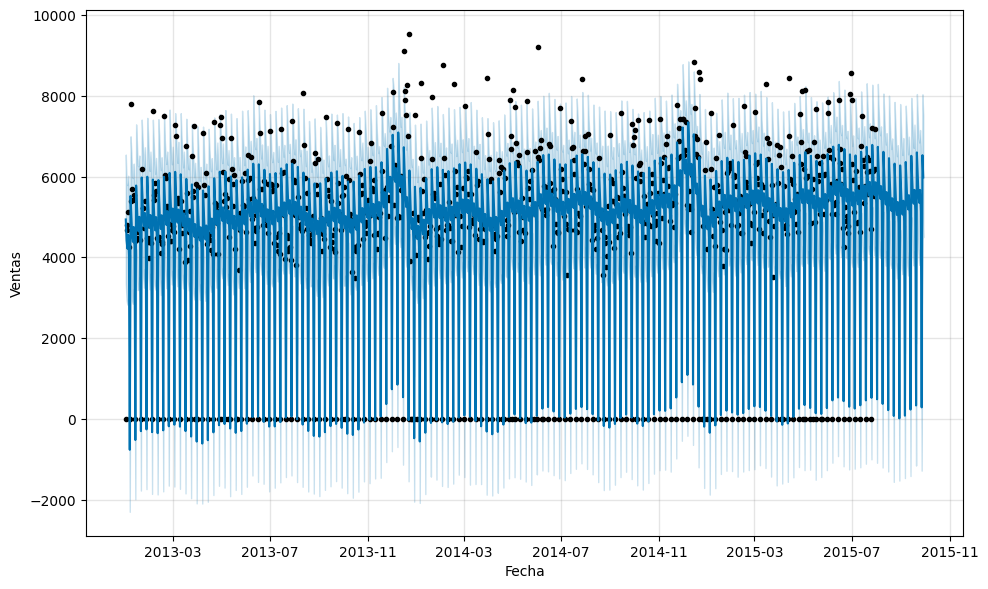

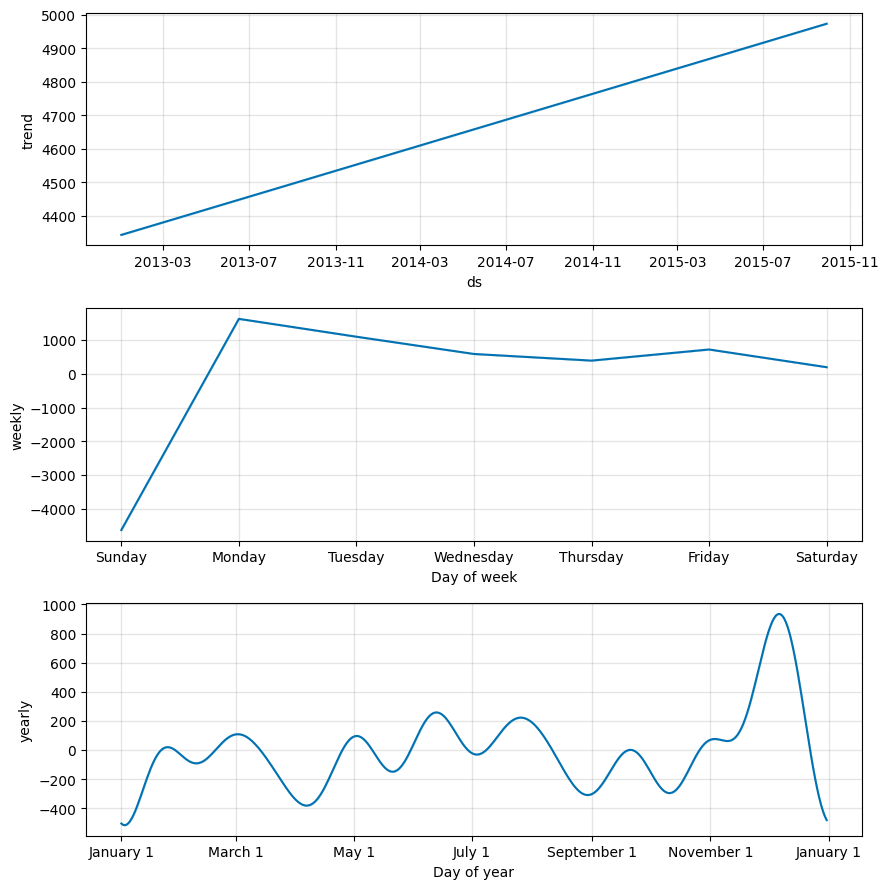

In [ ]:
#graficamos y vemos una primera prediccion con la tienda numero 10, por ejemplo
sales_predictions(10, sales_train_all_df, 60)
#los puntos o datos negros son los datos históricos; aquellos que conocemos y la prediccion es la banda azul fuere y la azul claro es el error
#el segundo grafico es la tendencia en años, el tercer tendencia en dias y el cuarto tendencia mensual

- primer grafico: Las bandas azaules son los intervalos de confianza y el algoritmo de fbprophet arroja las predicciones donde ya no hay puntos negros(que son nuestros datos)
- segundo grafico: tendencia general de los datos
- tercer grafico: tendencia por dias
- cuarto dia: tendencia por mes

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpltnk_22y/6je5kj0c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpltnk_22y/lt9neoqe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59384', 'data', 'file=/tmp/tmpltnk_22y/6je5kj0c.json', 'init=/tmp/tmpltnk_22y/lt9neoqe.json', 'output', 'file=/tmp/tmpltnk_22y/prophet_model0_vrd23w/prophet_model-20230520145957.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:59:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:59:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


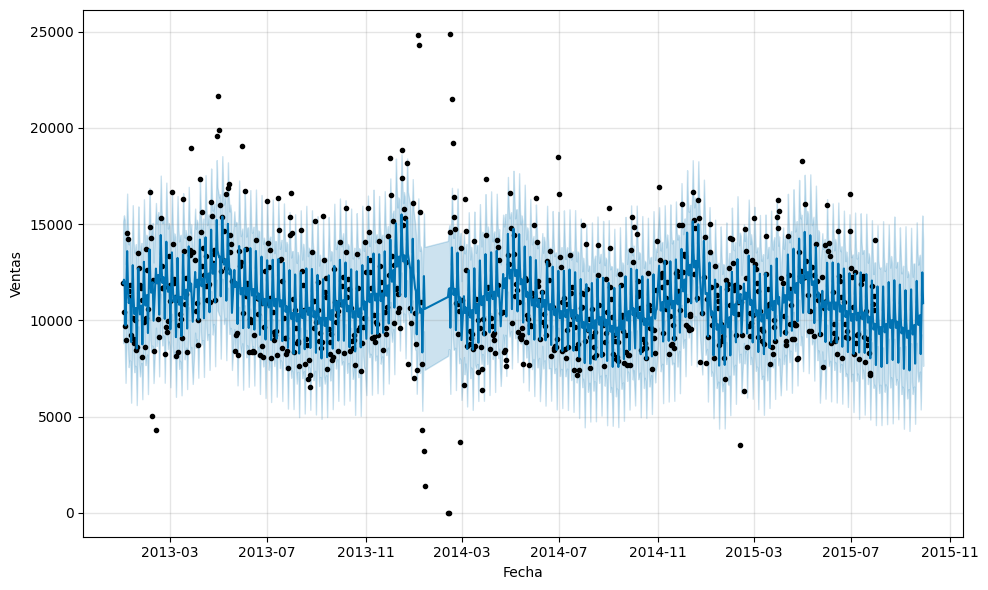

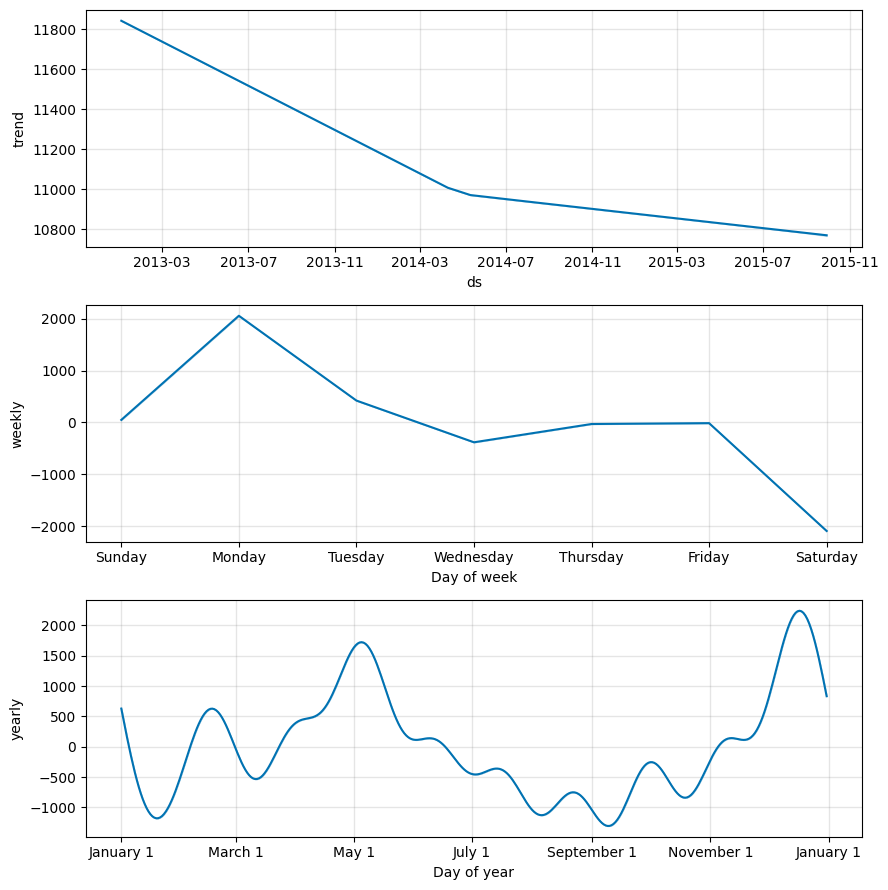

In [ ]:
#ahora con la tienda numero 25
sales_predictions(25, sales_train_all_df, 60)

# # 6: ENTRENAR AL MODELO PARTE B (efecto de estacionalidad; efecto de vacaciiones)

- StateHoliday: indica si el día era festivo o no (a = vacaciones públicas, b = vacaciones de Pascua holiday, c = Navidades, 0 = No era festivo)
- SchoolHoliday: indica si (Store, Date) se ve afectado por el cierre de las escuelas públicas
  






In [ ]:
#tomamos la funcion inicial y le hacemos modificaciones:
def sales_predictions(Store_ID, sales_df, holidays, periods):#introducimos holidays
    sales_df = sales_df[sales_df['Store'] == Store_ID]
    sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
    sales_df = sales_df.sort_values('ds')

    model    = Prophet(holidays=holidays)
    model.fit(sales_df)
    future   = model.make_future_dataframe(periods = periods)
    forecast = model.predict(future)
    figure   = model.plot(forecast, xlabel = "Fecha", ylabel = "Ventas")
    figure2  = model.plot_components(forecast)


In [ ]:
# Obtener el numero de fechas relacionadas con las vacaciones escolares
school_holidays = sales_train_all_df[sales_train_all_df['SchoolHoliday'] == 1].loc[:, 'Date'].values
school_holidays.shape

(163457,)

In [ ]:
#valores unicos(no repetidos)
school_holidays = np.unique(school_holidays)
school_holidays.shape
#477 dias de vacaciones

(477,)

In [ ]:
# Obtener todas las fechas correspondientes a los festivos estatales
state_holidays = sales_train_all_df[(sales_train_all_df['StateHoliday'] == 'a') | (sales_train_all_df['StateHoliday'] == 'b') | (sales_train_all_df['StateHoliday'] == 'c')].loc[:, 'Date'].values
state_holidays.shape
#vacaciones de todos los tipos; a,b,c

(910,)

In [ ]:
state_holidays = np.unique(state_holidays)
state_holidays.shape
#unicos de las vacaciones totales

(35,)

In [ ]:
#convertir a df pues fbprophet lo lee en ese formato con el nombre obligatorio ds
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays), 'holiday': 'school_holiday'})


In [ ]:
school_holidays

,ds,holiday
0,2013-01-01,school_holiday
1,2013-01-02,school_holiday
2,2013-01-03,school_holiday
3,2013-01-04,school_holiday
4,2013-01-05,school_holiday
...,...,...
472,2015-07-27,school_holiday
473,2015-07-28,school_holiday
474,2015-07-29,school_holiday
475,2015-07-30,school_holiday


In [ ]:
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays),  'holiday': 'state_holiday'})

In [ ]:
state_holidays

,ds,holiday
0,2013-01-01,state_holiday
1,2013-01-06,state_holiday
2,2013-03-29,state_holiday
3,2013-04-01,state_holiday
4,2013-05-01,state_holiday
5,2013-05-09,state_holiday
6,2013-05-20,state_holiday
7,2013-05-30,state_holiday
8,2013-08-15,state_holiday
9,2013-10-03,state_holiday


In [ ]:
# Concatenamos las vacaciones escolares y los festivos mediante la columna "ds"
school_state_holidays = pd.concat((state_holidays, school_holidays), axis = 0)
school_state_holidays

,ds,holiday
0,2013-01-01,state_holiday
1,2013-01-06,state_holiday
2,2013-03-29,state_holiday
3,2013-04-01,state_holiday
4,2013-05-01,state_holiday
...,...,...
472,2015-07-27,school_holiday
473,2015-07-28,school_holiday
474,2015-07-29,school_holiday
475,2015-07-30,school_holiday


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp97lekar8/x87n0bq_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp97lekar8/txmj_vv2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74619', 'data', 'file=/tmp/tmp97lekar8/x87n0bq_.json', 'init=/tmp/tmp97lekar8/txmj_vv2.json', 'output', 'file=/tmp/tmp97lekar8/prophet_modeljn01wtka/prophet_model-20230520183129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:31:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


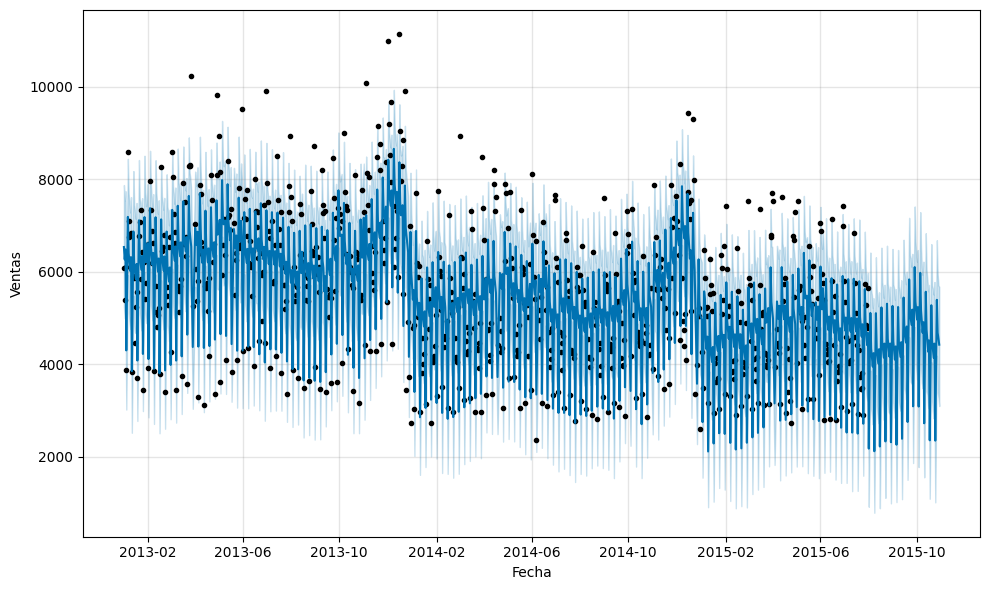

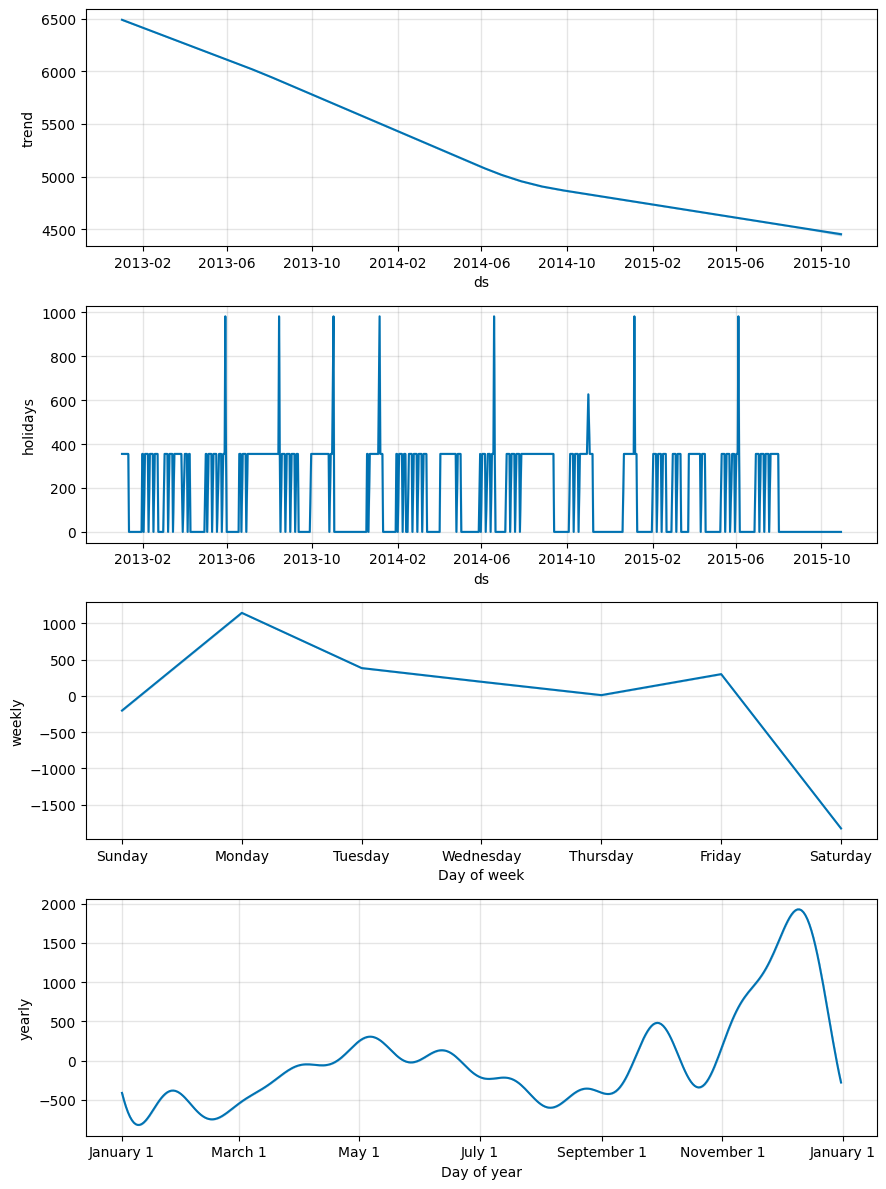

In [ ]:
# Hagamos predicciones usando días festivos para una tienda específica
sales_predictions(6, sales_train_all_df, school_state_holidays, 90)

- Notamos que la ttendencia en ventas baja a ritmo uniforme en los dias escolares